In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from terminal_optimization import container_objects
from terminal_optimization import container_defaults
from terminal_optimization import container_system

# 0. Prepare inputs

In [2]:
startyear = 2020
lifecycle = 10

## 0.1 Generate demand forecast scenario

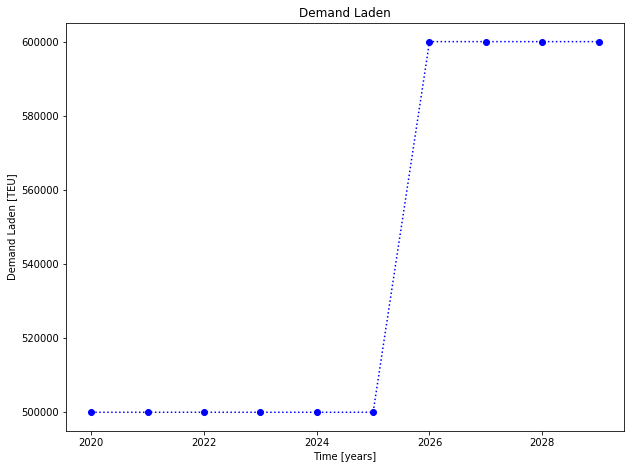

In [3]:
years = list(range(startyear, startyear+lifecycle))

demand = []
for year in years:
    if year < 2026:
        demand.append(500_000)
    else:
        demand.append(600_000)

scenario_data={'year': years, 'volume': demand}

# ladens
container_defaults.laden_data['historic_data'] = []
laden = container_objects.Commodity(**container_defaults.laden_data)
laden.scenario_data = pd.DataFrame(data=scenario_data)

# combine
demand = [laden]


# plot scenarios 
if True:
    laden.plot_demand()

   
    

## 0.2 Generate vessels

In [4]:
# instantiate vessels
handysize = container_objects.Vessel(**container_defaults.handysize_data)
handymax = container_objects.Vessel(**container_defaults.handymax_data)
panamax = container_objects.Vessel(**container_defaults.panamax_data)


vessels = [handysize, handymax, panamax] 


# 1. Instatiate terminal system

In [5]:
Terminal = container_system.System(startyear = startyear, 
                         lifecycle = lifecycle, 
                         elements = demand + vessels, 
                         operational_hours = 7665,   # example Wijnand
                         debug=True,
                         crane_type_defaults=container_defaults.sts_crane_data, 
                         storage_type_defaults=container_defaults.silo_data)

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [6]:
Terminal.simulate()


Simulate year: 2020
  Total vessel calls: 167
     Handysize calls: 0
     Handymax calls: 0
     Panamax calls: 167
  Total cargo volume: 500000
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy planned (@ start of year): inf
     Berth occupancy online (@ start of year): inf
     Crane occupancy planned (@ start of year): inf
     Crane occupancy online (@ start of year): inf
     waiting time factor (@ start of year): inf
     waiting time occupancy (@ start of year): inf
  *** add Berth to elements
     Berth occupancy planned (after adding berth): inf
     Berth occupancy online (after adding berth): inf
  *** ad

     Berth occupancy planned (@ start of year): 0.46718230671263944
     Berth occupancy online (@ start of year): 0.46718230671263944
     Crane occupancy planned (@ start of year): 0.3106265337185103
     Crane occupancy online (@ start of year): 0.3106265337185103
     waiting time factor (@ start of year): 0.05738399561383928
     waiting time occupancy (@ start of year): 0.017824991648445095
  *** add Harbour crane to elements
     Berth occupancy planned (after adding crane): 0.4361196533407884
     Berth occupancy online (after adding crane): 0.46718230671263944
  *** add Harbour crane to elements
     Berth occupancy planned (after adding crane): 0.4107047551274557
     Berth occupancy online (after adding crane): 0.46718230671263944
  *** add Harbour crane to elements
     Berth occupancy planned (after adding crane): 0.38952567328301185
     Berth occupancy online (after adding crane): 0.46718230671263944
     a total of 400 ton of quay conveyor service capacity is online; 40

PV: [-4.96477728e+07 -1.42304697e+08  2.35647470e+08  2.37362241e+08
  2.38872139e+08  2.39518835e+08  2.74466431e+08  2.90640007e+08
  2.91758294e+08  2.92742973e+08]
NPV: 1909055919.8248658


## Report all elements

In [7]:
if True: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)


Laden

{'historic_data': [], 'scenario_data':    year  volume
0  2020  500000
1  2021  500000
2  2022  500000
3  2023  500000
4  2024  500000
5  2025  500000
6  2026  600000
7  2027  600000
8  2028  600000
9  2029  600000, 'handling_fee': 500, 'handysize_perc': 0, 'handymax_perc': 0, 'panamax_perc': 100, 'name': 'Laden', 'id': 'afafb74a-61b1-11e9-80d2-7c76353a4af7'}

Handysize_1

{'type': 'Handysize', 'call_size': 35000, 'LOA': 130, 'draft': 10, 'beam': 24, 'max_cranes': 2, 'all_turn_time': 24, 'mooring_time': 3, 'demurrage_rate': 600, 'name': 'Handysize_1', 'id': 'afd05f08-61b1-11e9-b999-7c76353a4af7'}

Handymax_1

{'type': 'Handymax', 'call_size': 55000, 'LOA': 180, 'draft': 11.5, 'beam': 28, 'max_cranes': 2, 'all_turn_time': 24, 'mooring_time': 3, 'demurrage_rate': 750, 'name': 'Handymax_1', 'id': 'afd05f09-61b1-11e9-bdf2-7c76353a4af7'}

Panamax_1

{'type': 'Panamax', 'call_size': 3000, 'LOA': 290, 'draft': 13, 'beam': 32.2, 'max_cranes': 4, 'all_turn_time': 31, 'mooring_time': 6, 

{'triggers': [], 'labour': 98760.57692307694, 'maintenance': 8500.0, 'energy': [], 'insurance': 850.0, 'lease': [], 'demurrage': [], 'residual': [], 'capex': 86000, 'type': 'tractor_trailer', 'ownership': 'Terminal operator', 'delivery_time': 0, 'lifespan': 10, 'unit_rate': 85000, 'mobilisation': 1000, 'maintenance_perc': 0.1, 'insurance_perc': 0.01, 'crew': 1, 'utilisation': 0.8, 'fuel_consumption': 2, 'productivity': 1, 'required': 5, 'year_purchase': [], 'year_online': 2021, 'name': 'Tractor-trailer', 'id': 'b015a6f6-61b1-11e9-ad0d-7c76353a4af7', 'shift': 5.8961538461538465, 'df':    year    capex  maintenance  insurance        labour
0  2020  86000.0          0.0        0.0      0.000000
1  2021      0.0       8500.0      850.0  98760.576923
2  2022      0.0       8500.0      850.0  98760.576923
3  2023      0.0       8500.0      850.0  98760.576923
4  2024      0.0       8500.0      850.0  98760.576923
5  2025      0.0       8500.0      850.0  98760.576923
6  2026      0.0       8

{'triggers': [], 'labour': 98760.57692307694, 'maintenance': 8500.0, 'energy': [], 'insurance': 850.0, 'lease': [], 'demurrage': [], 'residual': [], 'capex': 86000, 'type': 'tractor_trailer', 'ownership': 'Terminal operator', 'delivery_time': 0, 'lifespan': 10, 'unit_rate': 85000, 'mobilisation': 1000, 'maintenance_perc': 0.1, 'insurance_perc': 0.01, 'crew': 1, 'utilisation': 0.8, 'fuel_consumption': 2, 'productivity': 1, 'required': 5, 'year_purchase': [], 'year_online': 2021, 'name': 'Tractor-trailer', 'id': 'b05177fe-61b1-11e9-9788-7c76353a4af7', 'shift': 5.8961538461538465, 'df':    year    capex  maintenance  insurance        labour
0  2020  86000.0          0.0        0.0      0.000000
1  2021      0.0       8500.0      850.0  98760.576923
2  2022      0.0       8500.0      850.0  98760.576923
3  2023      0.0       8500.0      850.0  98760.576923
4  2024      0.0       8500.0      850.0  98760.576923
5  2025      0.0       8500.0      850.0  98760.576923
6  2026      0.0       8

{'triggers': [], 'labour': 98760.57692307694, 'maintenance': 8500.0, 'energy': [], 'insurance': 850.0, 'lease': [], 'demurrage': [], 'residual': [], 'capex': 86000, 'type': 'tractor_trailer', 'ownership': 'Terminal operator', 'delivery_time': 0, 'lifespan': 10, 'unit_rate': 85000, 'mobilisation': 1000, 'maintenance_perc': 0.1, 'insurance_perc': 0.01, 'crew': 1, 'utilisation': 0.8, 'fuel_consumption': 2, 'productivity': 1, 'required': 5, 'year_purchase': [], 'year_online': 2026, 'name': 'Tractor-trailer', 'id': 'b0897894-61b1-11e9-bb44-7c76353a4af7', 'shift': 5.8961538461538465, 'df':    year    capex  maintenance  insurance        labour
0  2020      0.0          0.0        0.0      0.000000
1  2021      0.0          0.0        0.0      0.000000
2  2022      0.0          0.0        0.0      0.000000
3  2023      0.0          0.0        0.0      0.000000
4  2024      0.0          0.0        0.0      0.000000
5  2025  86000.0          0.0        0.0      0.000000
6  2026      0.0       8

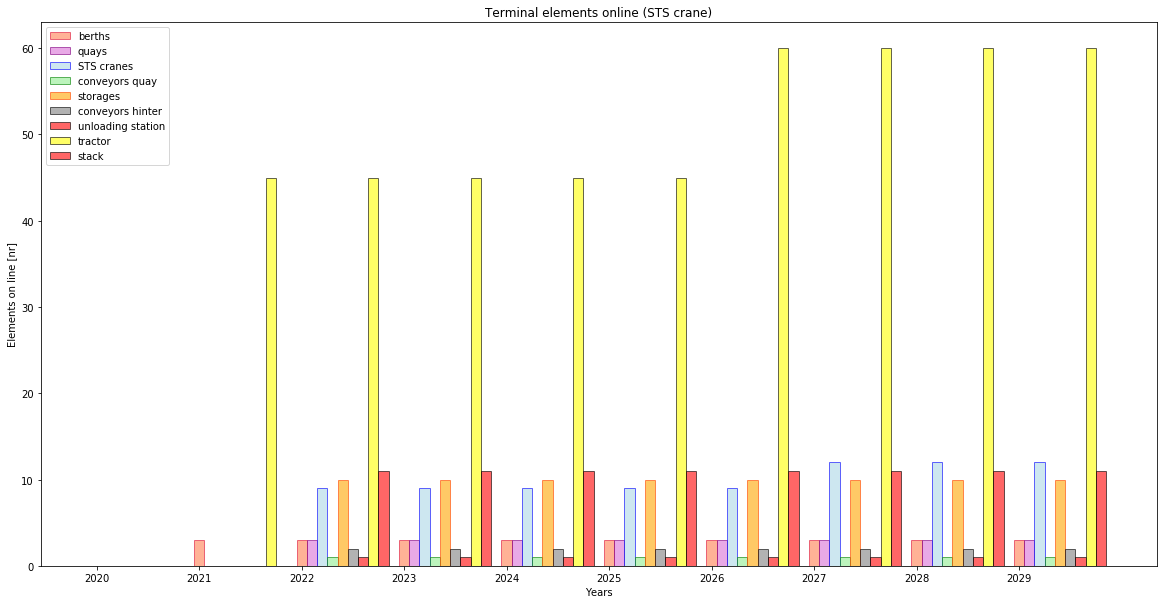

In [8]:
Terminal.terminal_elements_plot()

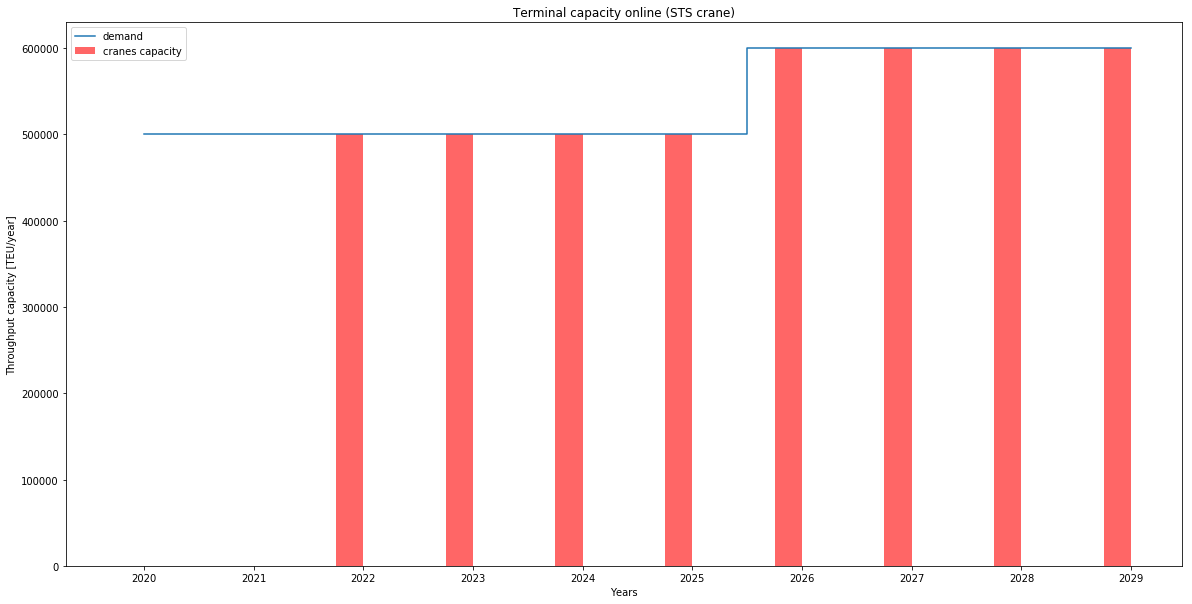

In [9]:
Terminal.terminal_capacity_plot()

In [10]:
# add cash flow information for each of the Terminal elements
cash_flows, cash_flows_WACC_real = Terminal.add_cashflow_elements()

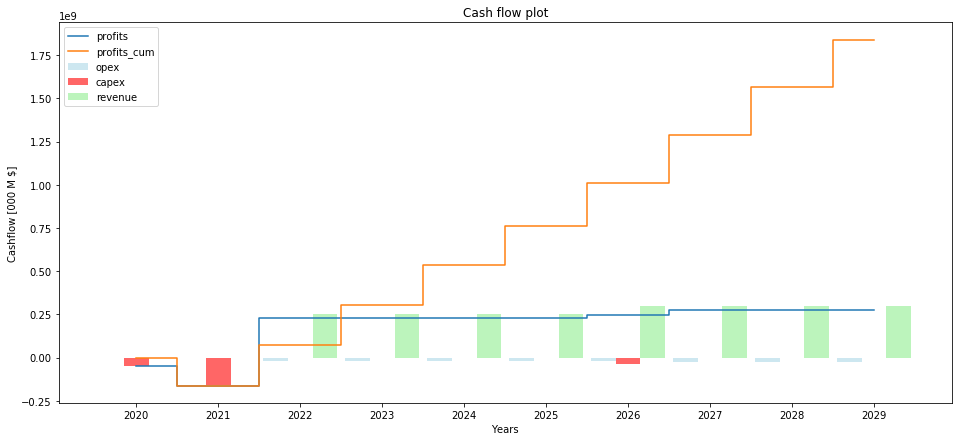

In [11]:
Terminal.cashflow_plot(cash_flows)

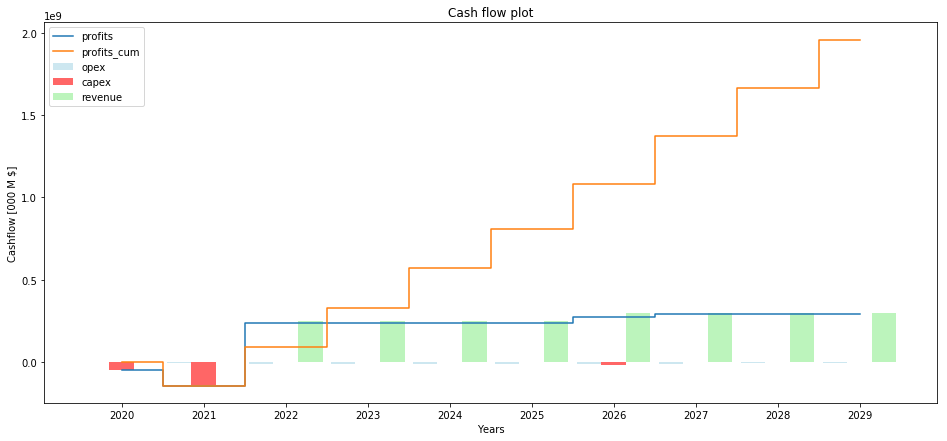

In [12]:
Terminal.cashflow_plot(cash_flows_WACC_real)

## SandBox

In [13]:
Terminal.NPV()

PV: [-4.96477728e+07 -1.42304697e+08  2.35647470e+08  2.37362241e+08
  2.38872139e+08  2.39518835e+08  2.74466431e+08  2.90640007e+08
  2.91758294e+08  2.92742973e+08]
NPV: 1909055919.8248658
